# RoadSafe Analytics: Road Accidents- Exploratory Data Analysis(EDA)

### Project Objective: To perform a in-depth Exploratory Data Analysis(EDA) of a large dataset of Accidents happened in US from 2016-2023 and draw meaningful insights from it like which factors have affected mostly to the likelihood of accidents in recent years and providing solutions to overcome accidents and so on.

### Expected Outcomes:-
### 1. Gain the ability to clean, preprocess, and understand real-world accident data effectively.

### 2. Explore accident patterns based on time, weather, road conditions, and severity using visual analysis.
 
### 3. Identify correlations, hotspots, and key risk factors through univariate, bivariate, and geospatial analysis.

### 4. Present meaningful insights with clear visualizations, documentation, and a final project presentation.

### Step 1: Setup - Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

sns.set_style('whitegrid')

### Step 2: Data Loading and Initial Inspection

In [2]:
roadsafe_df = pd.read_csv(r"F:\Roadsafe Analytics Project\us-accidents.csv", nrows=200000)
roadsafe_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     200000 non-null  object 
 1   Source                 200000 non-null  object 
 2   Severity               200000 non-null  int64  
 3   Start_Time             200000 non-null  object 
 4   End_Time               200000 non-null  object 
 5   Start_Lat              200000 non-null  float64
 6   Start_Lng              200000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           200000 non-null  float64
 10  Description            200000 non-null  object 
 11  Street                 200000 non-null  object 
 12  City                   199986 non-null  object 
 13  County                 200000 non-null  object 
 14  State                  200000 non-nu

In [4]:
roadsafe_df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  200000
End_Lng                  200000
Distance(mi)                  0
Description                   0
Street                        0
City                         14
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          1543
Temperature(F)             2835
Wind_Chill(F)            178610
Humidity(%)                3243
Pressure(in)               2203
Visibility(mi)             3263
Wind_Direction             1556
Wind_Speed(mph)           38440
Precipitation(in)        181648
Weather_Condition          2788
Amenity                       0
Bump                          0
Crossing

In [5]:
print("Descriptive statistics:-")
roadsafe_df.describe()

Descriptive statistics:-


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,200000.000000,200000.000000,200000.000000,0.0,0.0,200000.000000,197165.00000,21390.000000,196757.000000,197797.000000,196737.000000,161560.000000,18352.000000
mean,2.410060,35.402579,-104.355926,NaN,NaN,0.033965,65.68728,30.399621,63.903195,30.001038,9.281449,8.512051,0.057414
std,0.494724,4.582634,17.870632,NaN,NaN,0.535451,16.43741,19.850108,21.603255,0.271988,1.991511,6.313318,0.493516
min,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,-13.00000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.754379,-118.437279,NaN,NaN,0.000000,57.00000,19.200000,50.000000,29.910000,10.000000,5.000000,0.000000
50%,2.000000,34.120522,-117.370598,NaN,NaN,0.000000,66.90000,30.300000,66.000000,30.000000,10.000000,8.100000,0.000000
75%,3.000000,38.514824,-83.764334,NaN,NaN,0.010000,77.00000,38.800000,81.000000,30.100000,10.000000,10.400000,0.030000
max,4.000000,44.895218,-70.590034,NaN,NaN,80.890000,132.60000,111.000000,100.000000,33.040000,80.000000,822.800000,10.140000


In [6]:
roadsafe_df['Street'].value_counts()

Street
I-5 N              3503
I-10 E             2703
US-101 N           2684
I-405 N            2576
San Diego Fwy S    2412
                   ... 
Western Way           1
NW 31st St            1
Dalbora Rd            1
Lockmiller Rd         1
Leominster Rd         1
Name: count, Length: 22102, dtype: int64

In [7]:
roadsafe_df['Start_Time']

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                 ...         
199995    2017-01-12 06:12:42
199996    2017-01-12 06:15:23
199997    2017-01-12 06:12:02
199998    2017-01-12 06:09:29
199999    2017-01-12 06:08:14
Name: Start_Time, Length: 200000, dtype: object

### Step 3: Data Cleaning and Preprocessing

In [8]:
# Dropping columns with excessive null values
cols = ['End_Lat','End_Lng']

roadsafe_df.drop(cols,axis=1,inplace=True)

In [9]:
print("Dataset after removing irrelevant columns:-")
roadsafe_df.head()

Dataset after removing irrelevant columns:-


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day


In [12]:
roadsafe_df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,200000.000000,200000.000000,200000.000000,200000.000000,197165.00000,196757.000000,197797.000000,196737.000000,161560.000000
mean,2.410060,35.402579,-104.355926,0.033965,65.68728,63.903195,30.001038,9.281449,8.512051
std,0.494724,4.582634,17.870632,0.535451,16.43741,21.603255,0.271988,1.991511,6.313318
min,1.000000,25.433098,-123.813927,0.000000,-13.00000,4.000000,0.120000,0.000000,0.000000
25%,2.000000,33.754379,-118.437279,0.000000,57.00000,50.000000,29.910000,10.000000,5.000000
50%,2.000000,34.120522,-117.370598,0.000000,66.90000,66.000000,30.000000,10.000000,8.100000
75%,3.000000,38.514824,-83.764334,0.010000,77.00000,81.000000,30.100000,10.000000,10.400000
max,4.000000,44.895218,-70.590034,80.890000,132.60000,100.000000,33.040000,80.000000,822.800000


In [10]:
roadsafe_df.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
City                         14
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          1543
Temperature(F)             2835
Wind_Chill(F)            178610
Humidity(%)                3243
Pressure(in)               2203
Visibility(mi)             3263
Wind_Direction             1556
Wind_Speed(mph)           38440
Precipitation(in)        181648
Weather_Condition          2788
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction

In [13]:
roadsafe_df['Wind_Chill(F)'].isnull().sum()

178610

In [14]:
roadsafe_df['Precipitation(in)'].isnull().sum()

181648

In [19]:
roadsafe_df.drop(columns=['Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)

In [11]:
roadsafe_df['Start_Time'] = pd.to_datetime(roadsafe_df['Start_Time'], errors='coerce')
roadsafe_df['End_Time'] = pd.to_datetime(roadsafe_df['End_Time'], errors='coerce')
roadsafe_df['Weather_Timestamp'] = pd.to_datetime(roadsafe_df['Weather_Timestamp'], errors='coerce')

In [20]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194570 entries, 0 to 199999
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     194570 non-null  object        
 1   Source                 194570 non-null  object        
 2   Severity               194570 non-null  int64         
 3   Start_Time             194570 non-null  datetime64[ns]
 4   End_Time               194570 non-null  datetime64[ns]
 5   Start_Lat              194570 non-null  float64       
 6   Start_Lng              194570 non-null  float64       
 7   Distance(mi)           194570 non-null  float64       
 8   Description            194570 non-null  object        
 9   Street                 194570 non-null  object        
 10  City                   194556 non-null  object        
 11  County                 194570 non-null  object        
 12  State                  194570 non-null  object   

In [21]:
roadsafe_df.isnull().sum()

ID                        0
Source                    0
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Description               0
Street                    0
City                     14
County                    0
State                     0
Zipcode                   0
Country                   0
Timezone                  0
Airport_Code              0
Weather_Timestamp         0
Temperature(F)            0
Humidity(%)               0
Pressure(in)              0
Visibility(mi)            0
Wind_Direction            0
Wind_Speed(mph)           0
Weather_Condition         0
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming     

In [17]:
roadsafe_df['Wind_Speed(mph)'].dtype

dtype('float64')

In [ ]:
roadsafe_df['Wind_Speed(mph)']

0        NaN
1        NaN
2        3.5
3        4.6
4        3.5
        ... 
49995    NaN
49996    4.6
49997    NaN
49998    NaN
49999    NaN
Name: Wind_Speed(mph), Length: 50000, dtype: float64

In [19]:
median_speed=roadsafe_df['Wind_Speed(mph)'].median()
roadsafe_df['Wind_Speed(mph)']=roadsafe_df['Wind_Speed(mph)'].fillna(median_speed)

In [16]:
roadsafe_df=roadsafe_df.dropna(subset=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Weather_Condition'])

In [22]:
roadsafe_df=roadsafe_df.dropna(subset=['City'])

In [23]:
print("Missing values after cleaning the dataset:-")
roadsafe_df.isnull().sum()

Missing values after cleaning the dataset:-


ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

In [24]:
roadsafe_df.describe(include="O")

,ID,Source,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,194556,194556,194556,194556,194556,194556,194556,194556,194556,194556,194556,194556,194556,194556,194556,194556,194556
unique,194556,2,140745,21594,2638,382,20,29842,1,3,436,24,54,2,2,2,2
top,A-1,Source2,Accident on I-80 Westbound at Exits 8A 8B I-880.,I-5 N,Los Angeles,Los Angeles,CA,91706,US,US/Pacific,KCQT,Calm,Clear,Day,Day,Day,Day
freq,1,193556,55,3426,12676,41591,111747,885,194556,111747,9463,34462,93183,133169,142031,151263,159014


In [25]:
# Creating new columns

roadsafe_df['WeekDay']=roadsafe_df['Start_Time'].dt.day_name()
roadsafe_df['Month']=roadsafe_df['Start_Time'].dt.month_name()

In [26]:
boolean_cols = roadsafe_df.select_dtypes(include=['bool']).columns
print(boolean_cols)

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


In [27]:
bool_cols = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
    'Traffic_Signal', 'Turning_Loop'
]
roadsafe_df[bool_cols] = roadsafe_df[bool_cols].astype(int)

In [28]:
roadsafe_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,WeekDay,Month
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,0,0,0,0,Night,Night,Night,Night,Monday,February
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,0,0,0,0,Night,Night,Night,Day,Monday,February
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,0,0,1,0,Night,Night,Day,Day,Monday,February
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,0,0,0,0,Night,Day,Day,Day,Monday,February
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,0,0,1,0,Day,Day,Day,Day,Monday,February


In [29]:
roadsafe_df[['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].nunique()

Sunrise_Sunset           2
Civil_Twilight           2
Nautical_Twilight        2
Astronomical_Twilight    2
dtype: int64

In [30]:
roadsafe_df['TimeOfDay'] = roadsafe_df['Sunrise_Sunset'].map({
    'Day': 'Day',
    'Night': 'Night'
})

In [31]:
roadsafe_df.drop(
    ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
    axis=1,
    inplace=True
)

In [32]:
# Removing irrelevant columns

cols_to_drop = [
    'ID', 'Description', 'Street', 'Zipcode', 'Country',
    'Airport_Code', 'Source', 'Turning_Loop', 'Timezone']

roadsafe_df.drop(columns=cols_to_drop, inplace=True)

In [35]:
# Detecting Outliers

numeric_cols = roadsafe_df.select_dtypes(include=['int64','float64']).columns

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.index.tolist()
    
all_outliers = {}
for col in numeric_cols:
    outlier_indices = detect_outliers_iqr(roadsafe_df, col)
    all_outliers[col] = outlier_indices
    print(f"{col}: {len(outlier_indices)} outliers ({len(outlier_indices)/len(roadsafe_df)*100:.4f}%)")

outlier_rows = roadsafe_df.loc[sorted(set(idx for indices in all_outliers.values() for idx in indices))]
print(f"\nTotal unique rows with outliers: {len(outlier_rows)}")

Severity: 0 outliers (0.0000%)
Start_Lat: 8270 outliers (4.2507%)
Start_Lng: 0 outliers (0.0000%)
Distance(mi): 1732 outliers (0.8902%)
Temperature(F): 5662 outliers (2.9102%)
Humidity(%): 0 outliers (0.0000%)
Pressure(in): 9029 outliers (4.6408%)
Visibility(mi): 32931 outliers (16.9262%)
Wind_Speed(mph): 5321 outliers (2.7349%)

Total unique rows with outliers: 54458


In [36]:
# Handling outliers

cols_to_cap = ['Start_Lat', 'Distance(mi)', 'Temperature(F)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']

for col in cols_to_cap:
    lower = roadsafe_df[col].quantile(0.01)
    upper = roadsafe_df[col].quantile(0.99)
    roadsafe_df[col] = roadsafe_df[col].clip(lower=lower, upper=upper)

for col in cols_to_cap:
    print(f"{col}: min={roadsafe_df[col].min()}, max={roadsafe_df[col].max()}")

Start_Lat: min=25.789072, max=43.0344996
Distance(mi): min=0.0, max=0.01
Temperature(F): min=16.0, max=95.0
Pressure(in): min=29.19, max=30.5
Visibility(mi): min=1.0, max=10.0
Wind_Speed(mph): min=3.5, max=20.7


### Step 3: Univariate Analysis 

In [37]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194556 entries, 0 to 199999
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           194556 non-null  int64         
 1   Start_Time         194556 non-null  datetime64[ns]
 2   End_Time           194556 non-null  datetime64[ns]
 3   Start_Lat          194556 non-null  float64       
 4   Start_Lng          194556 non-null  float64       
 5   Distance(mi)       194556 non-null  float64       
 6   City               194556 non-null  object        
 7   County             194556 non-null  object        
 8   State              194556 non-null  object        
 9   Weather_Timestamp  194556 non-null  datetime64[ns]
 10  Temperature(F)     194556 non-null  float64       
 11  Humidity(%)        194556 non-null  float64       
 12  Pressure(in)       194556 non-null  float64       
 13  Visibility(mi)     194556 non-null  float64      

Text(0.5, 1.0, 'Week Day Distribution')

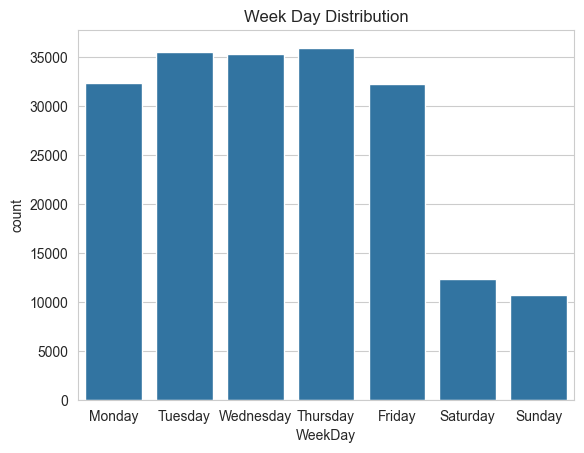

In [38]:
sns.countplot(x='WeekDay',data=roadsafe_df).set_title('Week Day Distribution') 

### Key Insights:-
#### Most of the accidents happened on Tuesday,Wednesday and Thursday.

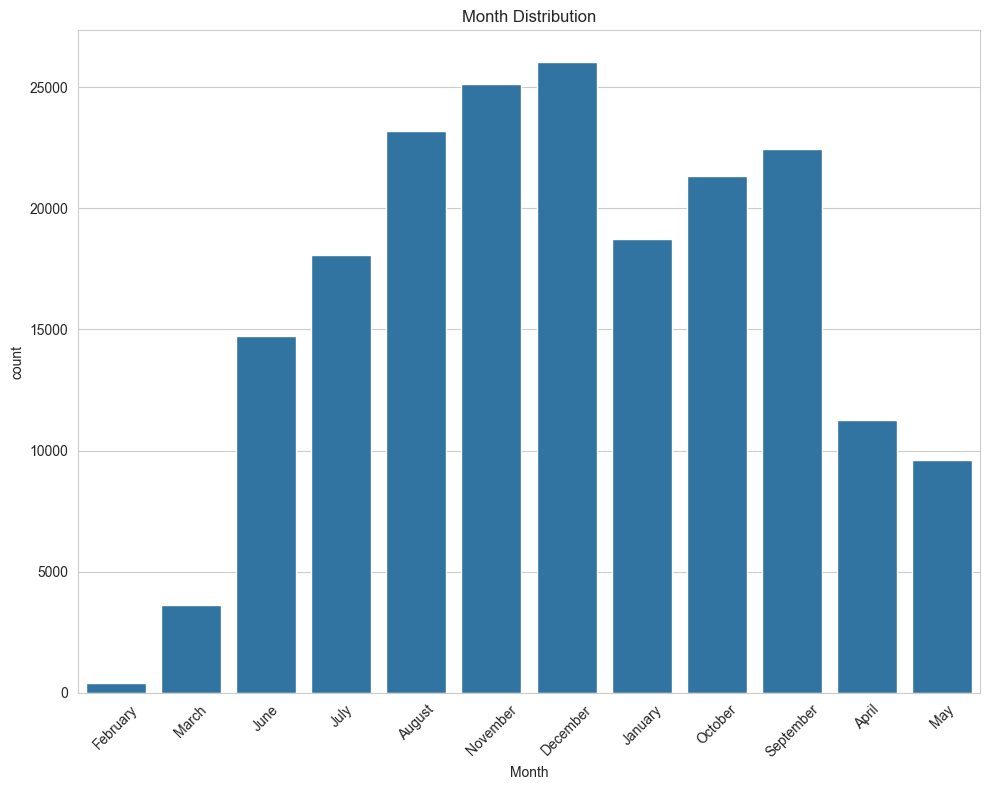

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month',data=roadsafe_df)
plt.title('Month Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Insights:-
#### Accidents in US have occured the most in the months of November and December.

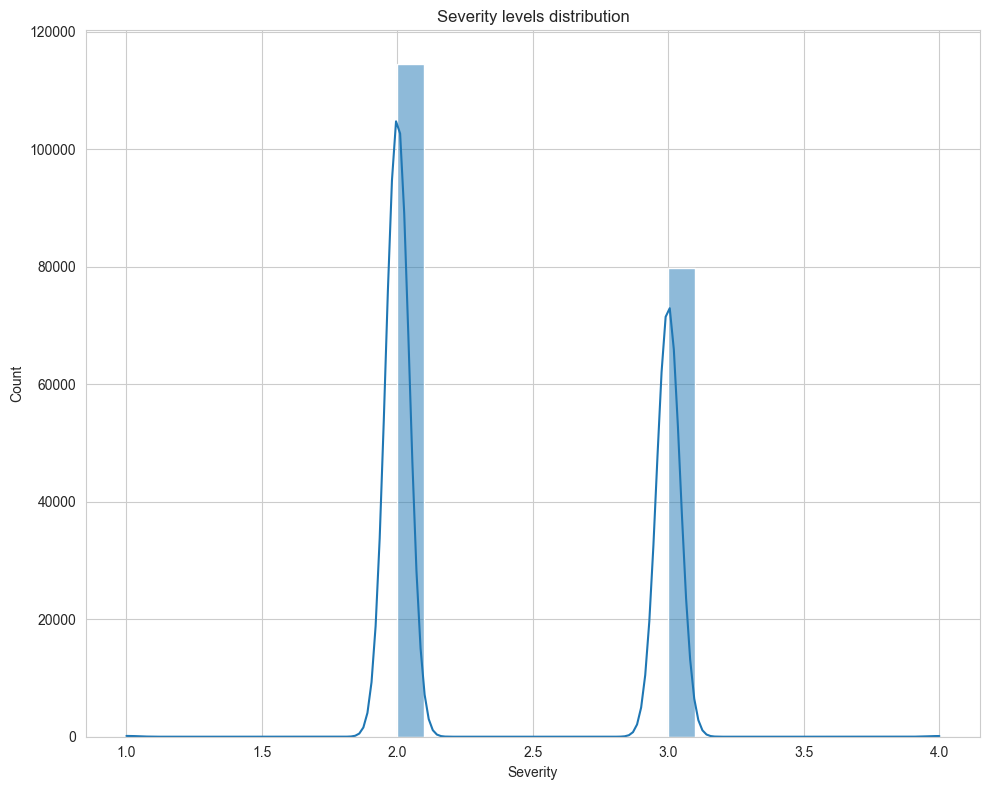

In [40]:
plt.figure(figsize=(10,8))
sns.histplot(x='Severity',data=roadsafe_df,bins=30,kde=True)
plt.title('Severity levels distribution')
plt.tight_layout()
plt.show()

### Key Insights:-
#### The severity distribution peaks at levels 2 and 3, indicating that most accidents in the dataset are of moderate to moderately high severity, while extremely severe accidents (level 4) are relatively rare.

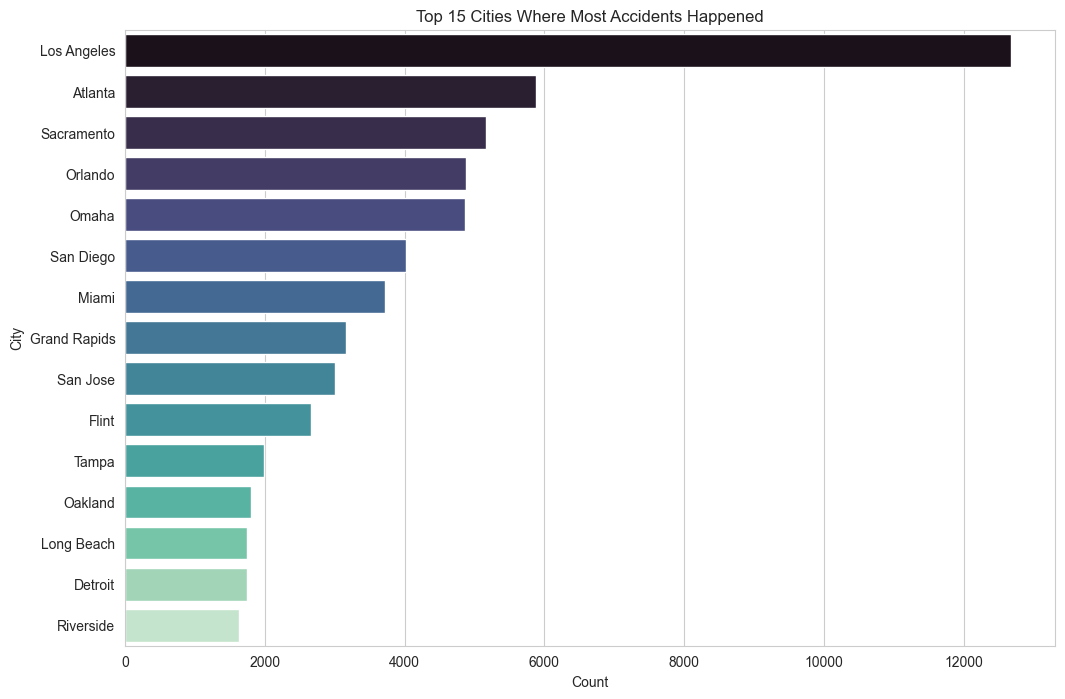

In [41]:
# Get the top 15 cities and their counts
top_cities_counts = roadsafe_df['City'].value_counts().reset_index()
top_cities_counts.columns = ['City', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_cities_counts_plot = top_cities_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='City', x='count', data=top_cities_counts_plot, palette='mako', hue='City', legend=False)
plt.title('Top 15 Cities Where Most Accidents Happened')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

### Key Insights:-

#### Most accidents happened in Los Angeles.

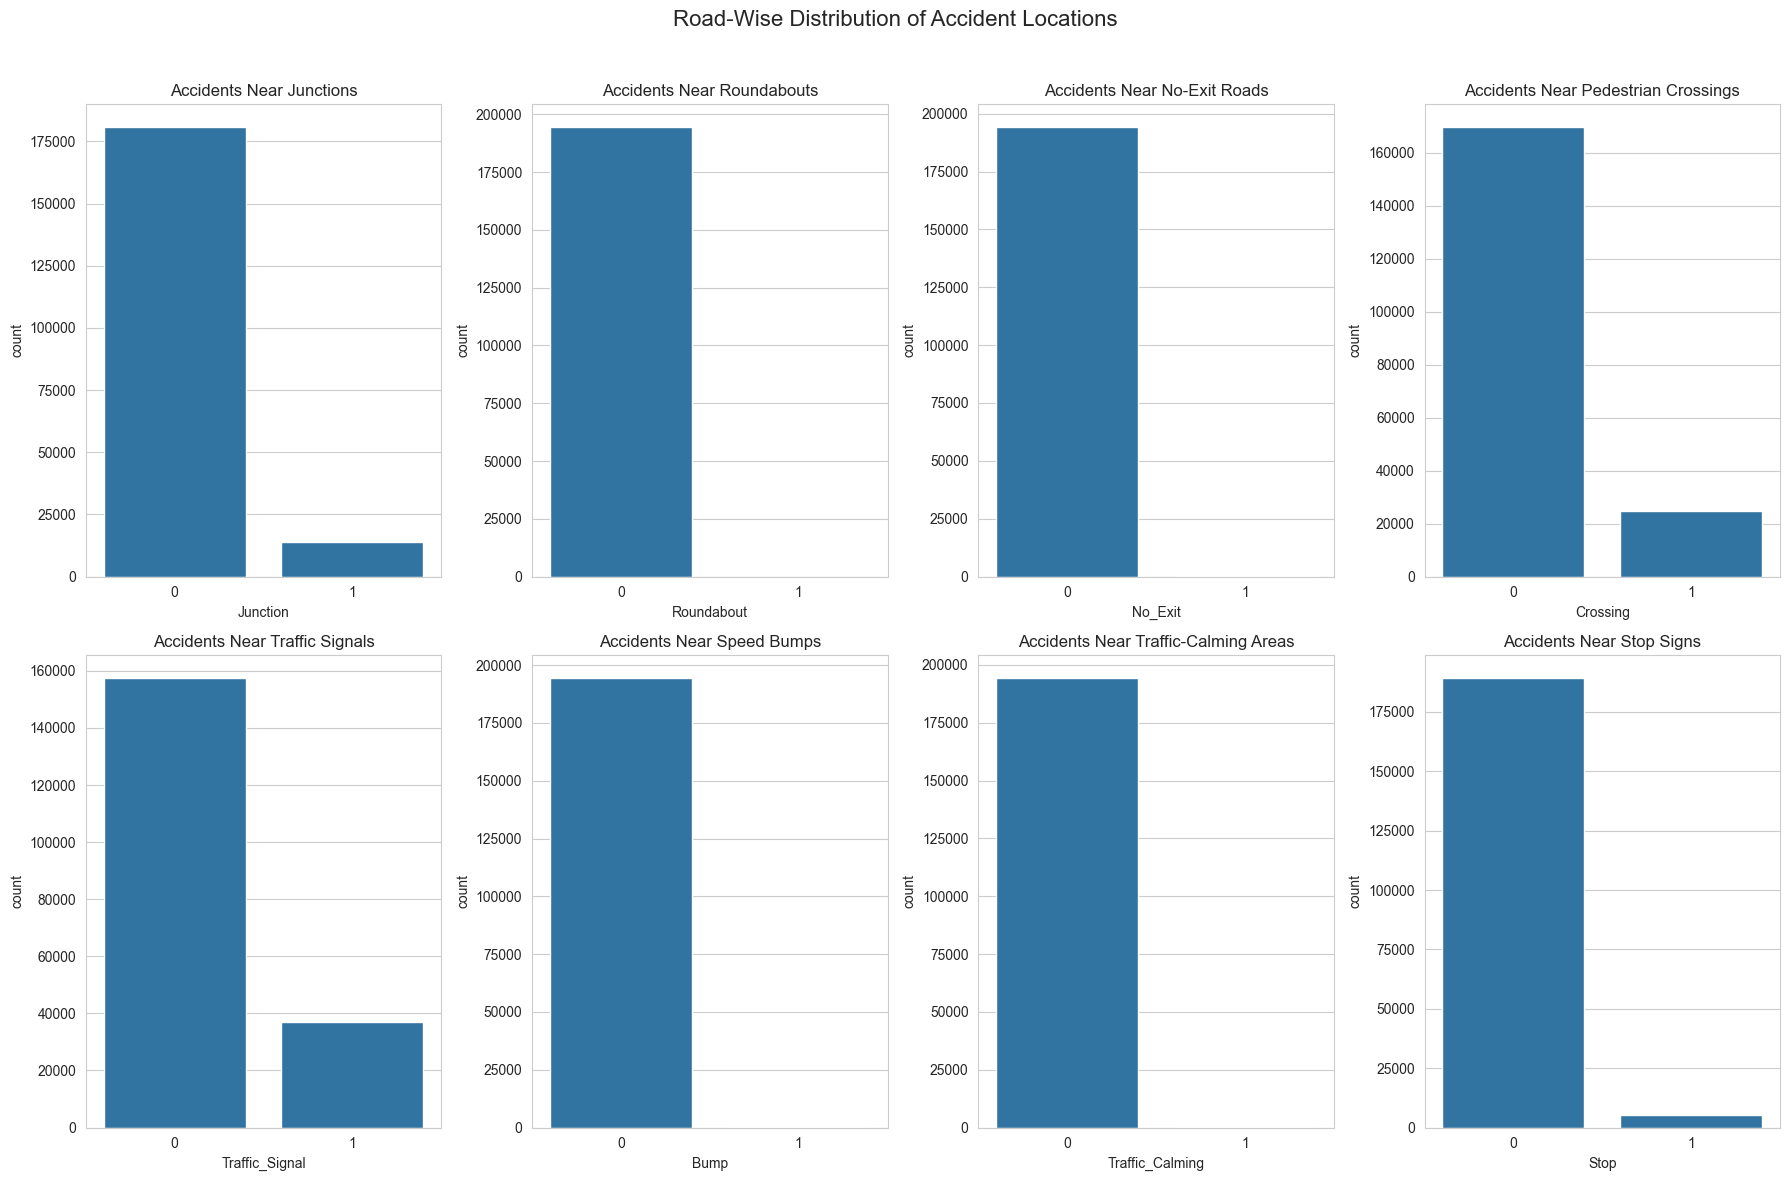

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
fig.suptitle('Road-Wise Distribution of Accident Locations', fontsize=16)

# Row 1
sns.countplot(ax=axes[0, 0], x='Junction', data=roadsafe_df).set_title('Accidents Near Junctions')
sns.countplot(ax=axes[0, 1], x='Roundabout', data=roadsafe_df).set_title('Accidents Near Roundabouts')
sns.countplot(ax=axes[0, 2], x='No_Exit', data=roadsafe_df).set_title('Accidents Near No-Exit Roads')
sns.countplot(ax=axes[0, 3], x='Crossing', data=roadsafe_df).set_title('Accidents Near Pedestrian Crossings')

# Row 2
sns.countplot(ax=axes[1, 0], x='Traffic_Signal', data=roadsafe_df).set_title('Accidents Near Traffic Signals')
sns.countplot(ax=axes[1, 1], x='Bump', data=roadsafe_df).set_title('Accidents Near Speed Bumps')
sns.countplot(ax=axes[1, 2], x='Traffic_Calming', data=roadsafe_df).set_title('Accidents Near Traffic-Calming Areas')
sns.countplot(ax=axes[1, 3], x='Stop', data=roadsafe_df).set_title('Accidents Near Stop Signs')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Key Insights:-

#### 1. No accident happened near a Roundabout, No_Exit, Bump and Traffic Calming road types.
#### 2. Junctions, Crossings, Traffic_Signal and Stop are the road types where most accidents happened.

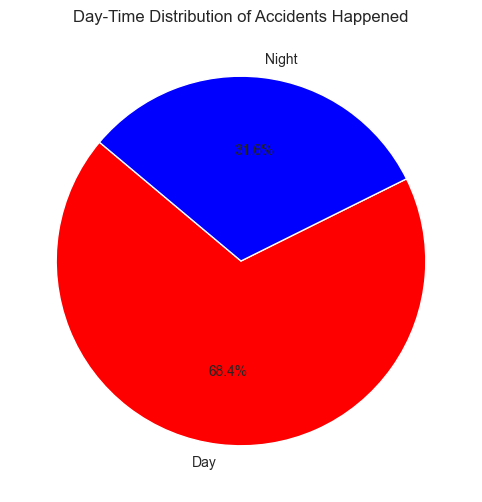

In [44]:
plt.figure(figsize=(8, 6))
daytime_counts = roadsafe_df['TimeOfDay'].value_counts()
plt.pie(daytime_counts, labels=daytime_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
plt.title('Day-Time Distribution of Accidents Happened')
plt.ylabel('')
plt.show()

### Key Insights:-
#### Accidents happened mostly in daytime.

### Step-4:Bivariate Analysis

Bivariate Analysis: Feature vs. Severity


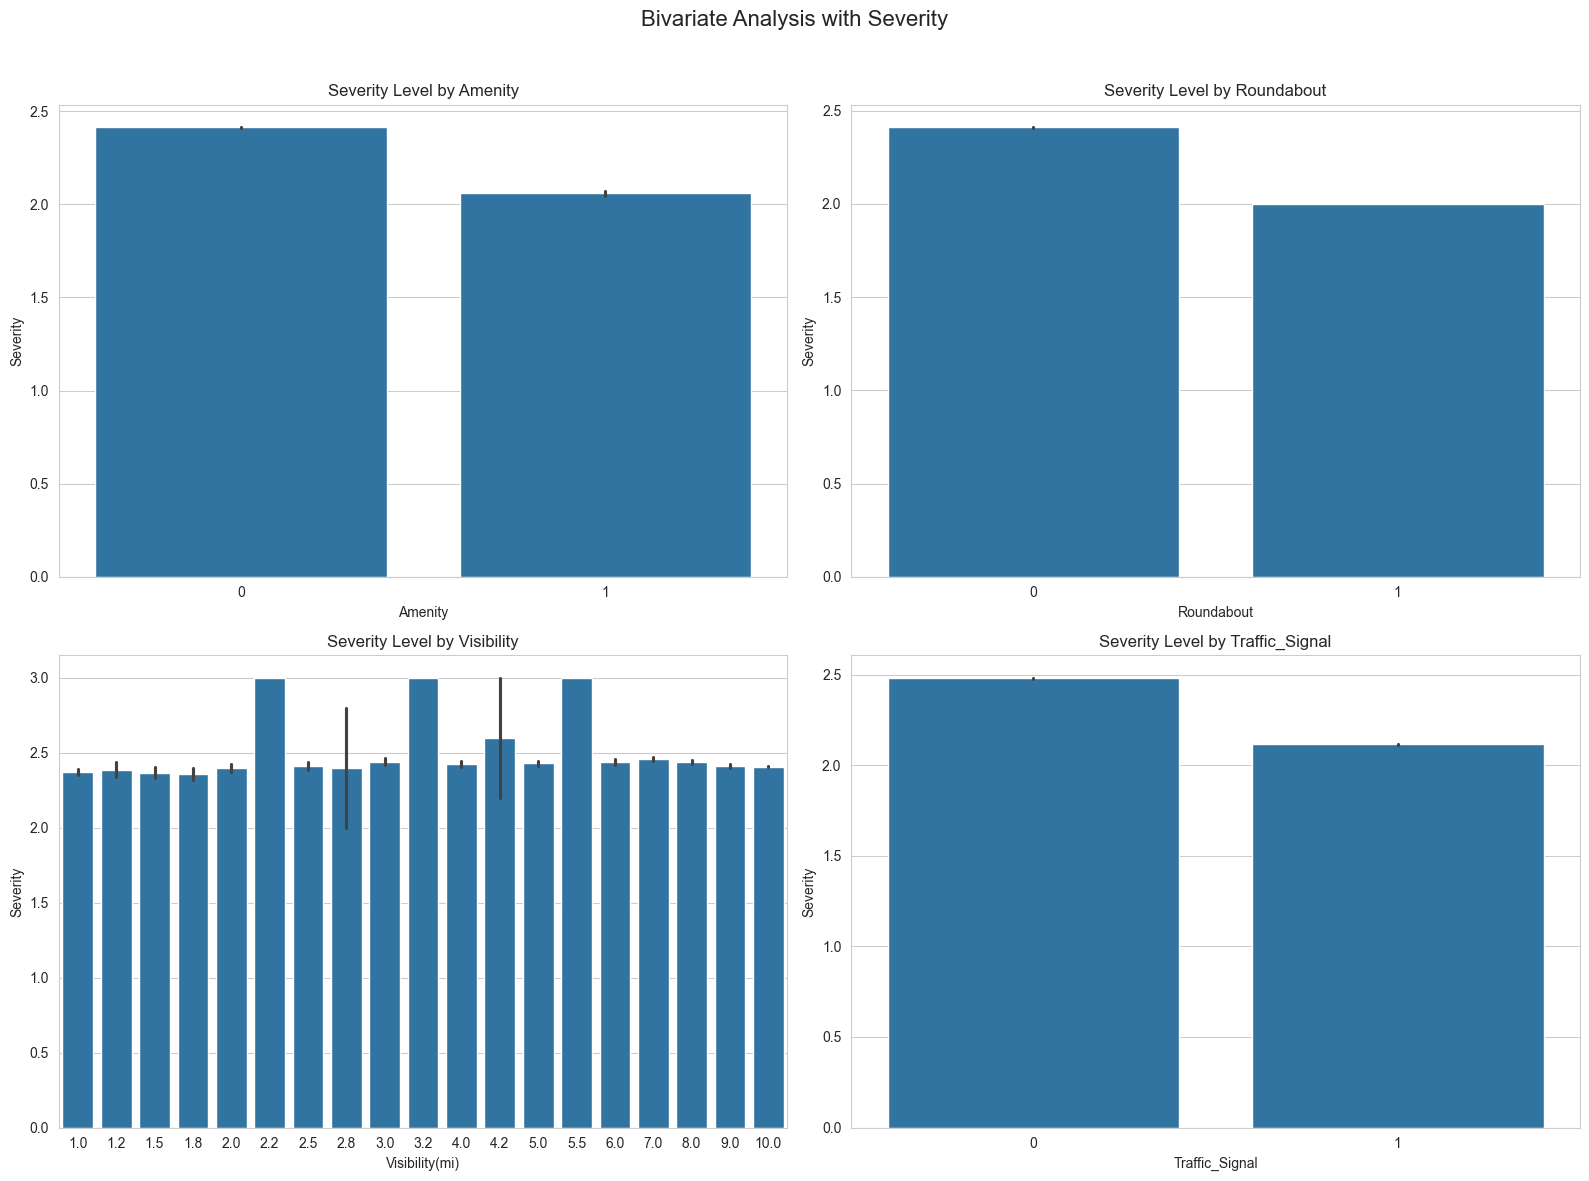

In [45]:
print("Bivariate Analysis: Feature vs. Severity")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Severity', fontsize=16)

sns.barplot(ax=axes[0, 0], x='Amenity', y='Severity', data=roadsafe_df).set_title('Severity Level by Amenity')

sns.barplot(ax=axes[0, 1], x='Roundabout', y='Severity', data=roadsafe_df).set_title('Severity Level by Roundabout')

sns.barplot(ax=axes[1, 0], x='Visibility(mi)', y='Severity', data=roadsafe_df).set_title('Severity Level by Visibility')

sns.barplot(ax=axes[1, 1], x='Traffic_Signal', y='Severity', data=roadsafe_df).set_title('Severity Level by Traffic_Signal')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Key Insights:-

#### 1. Amenity and Roundabout: When there is an amenity or a roundabout, the severity level is around 2.
#### 2. Visibility(mi): The severity level is highest when the visibility is lowest.
#### 3. Traffic_Signal: When there is a traffic signal present in an area, the severity of accident is moderate.

In [ ]:
roadsafe_df.drop('Sunrise_Sunset',axis=1,inplace=True)

In [47]:
roadsafe_df.drop('Weather_Timestamp',axis=1,inplace=True)

In [48]:
roadsafe_df.describe(include="O")

,City,County,State,Wind_Direction,Weather_Condition,WeekDay,Month,TimeOfDay
count,194556,194556,194556,194556,194556,194556,194556,194556
unique,2638,382,20,24,54,7,12,2
top,Los Angeles,Los Angeles,CA,Calm,Clear,Thursday,December,Day
freq,12676,41591,111747,34462,93183,35991,26043,133169


<Axes: xlabel='Severity', ylabel='Distance(mi)'>

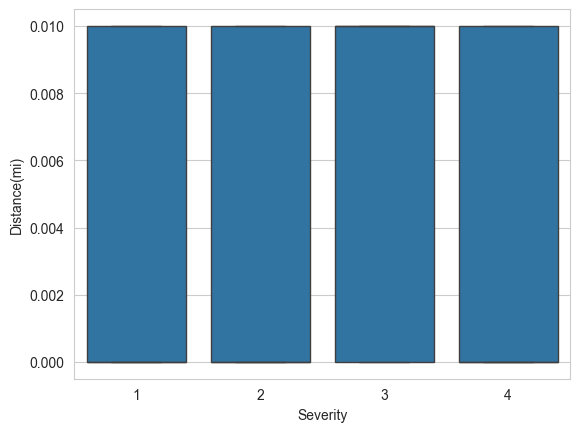

In [49]:
sns.boxplot(x='Severity', y='Distance(mi)', data=roadsafe_df)

<Axes: xlabel='Severity', ylabel='Temperature(F)'>

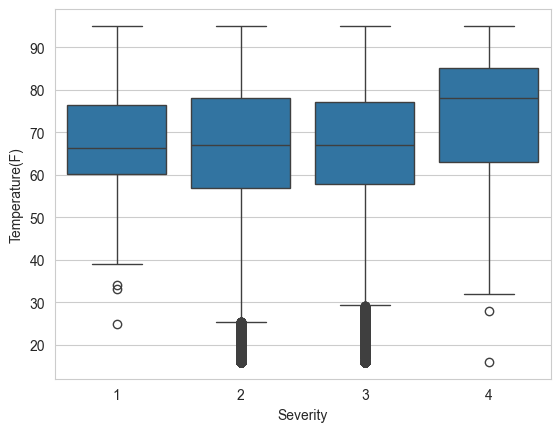

In [50]:
sns.boxplot(x='Severity', y='Temperature(F)', data=roadsafe_df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Light Rain'),
  Text(1, 0, 'Overcast'),
  Text(2, 0, 'Mostly Cloudy'),
  Text(3, 0, 'Rain'),
  Text(4, 0, 'Light Snow'),
  Text(5, 0, 'Haze'),
  Text(6, 0, 'Scattered Clouds'),
  Text(7, 0, 'Partly Cloudy'),
  Text(8, 0, 'Clear'),
  Text(9, 0, 'Fair')])

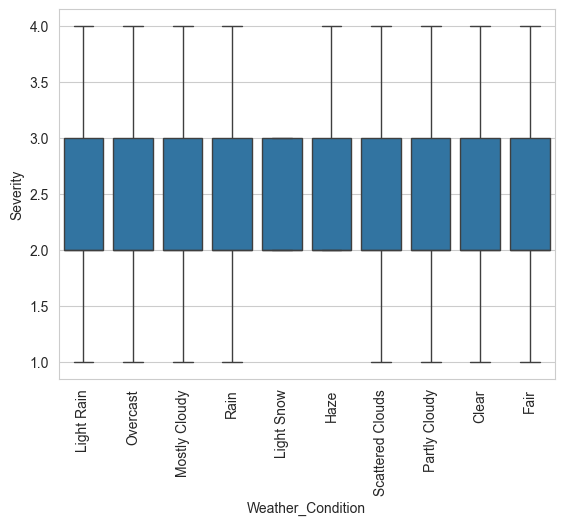

In [51]:
top_weather = roadsafe_df['Weather_Condition'].value_counts().index[:10]
sns.boxplot(x='Weather_Condition', y='Severity', data=roadsafe_df[roadsafe_df['Weather_Condition'].isin(top_weather)])
plt.xticks(rotation=90)

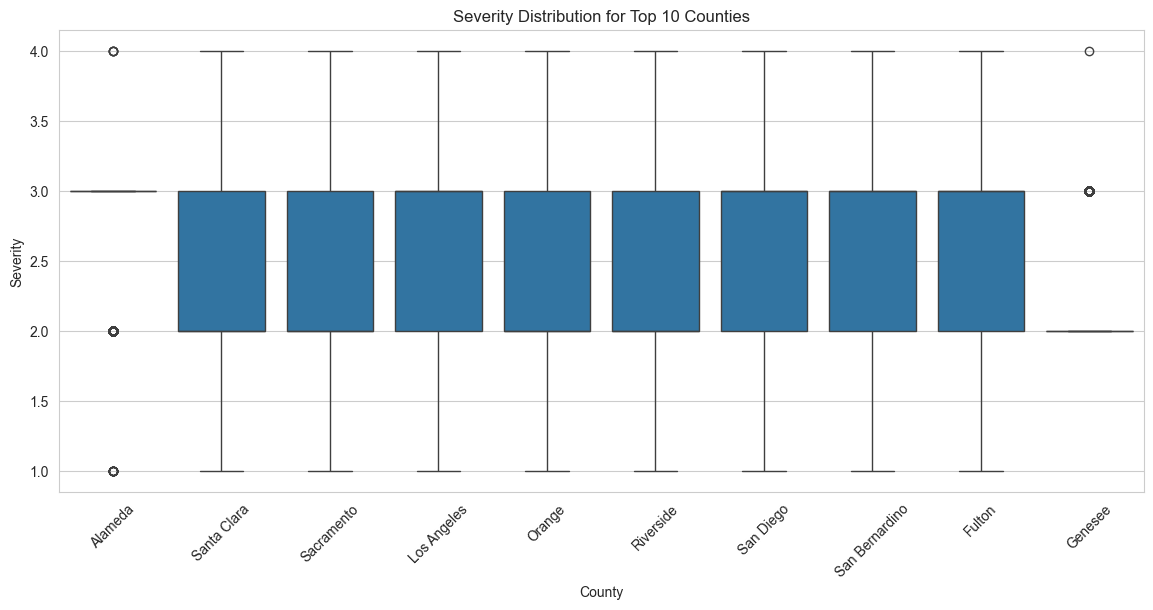

In [52]:
top10_counties = roadsafe_df['County'].value_counts().head(10).index
df_top10 = roadsafe_df[roadsafe_df['County'].isin(top10_counties)]
plt.figure(figsize=(14,6))
sns.boxplot(x='County', y='Severity', data=df_top10)
plt.title("Severity Distribution for Top 10 Counties")
plt.xticks(rotation=45)
plt.show()

### Step-5 : Multivariate Analysis

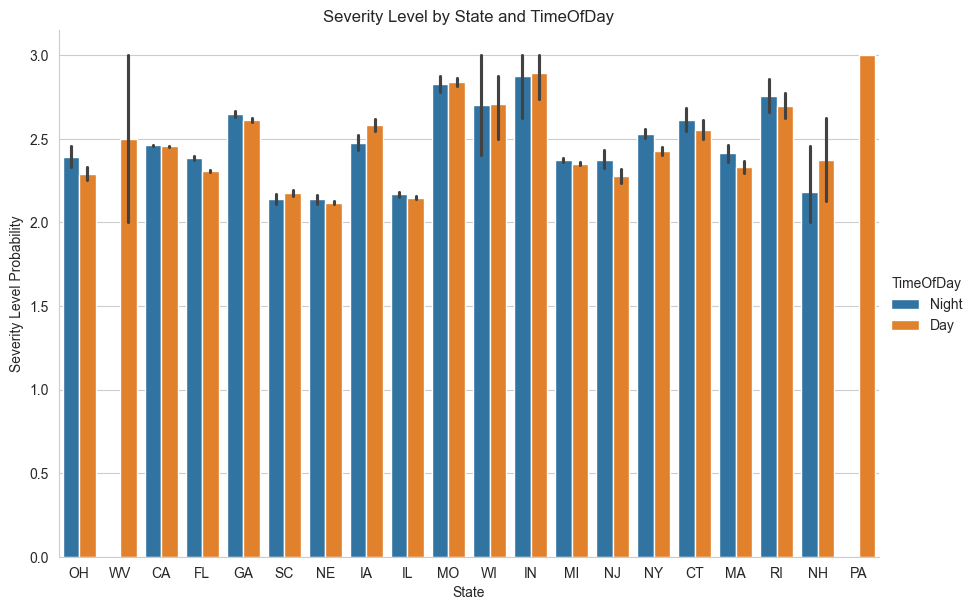

In [53]:
sns.catplot(x='State', y='Severity', hue='TimeOfDay', data=roadsafe_df, kind='bar', height=6, aspect=1.5)
plt.title('Severity Level by State and TimeOfDay')
plt.ylabel('Severity Level Probability')
plt.show()

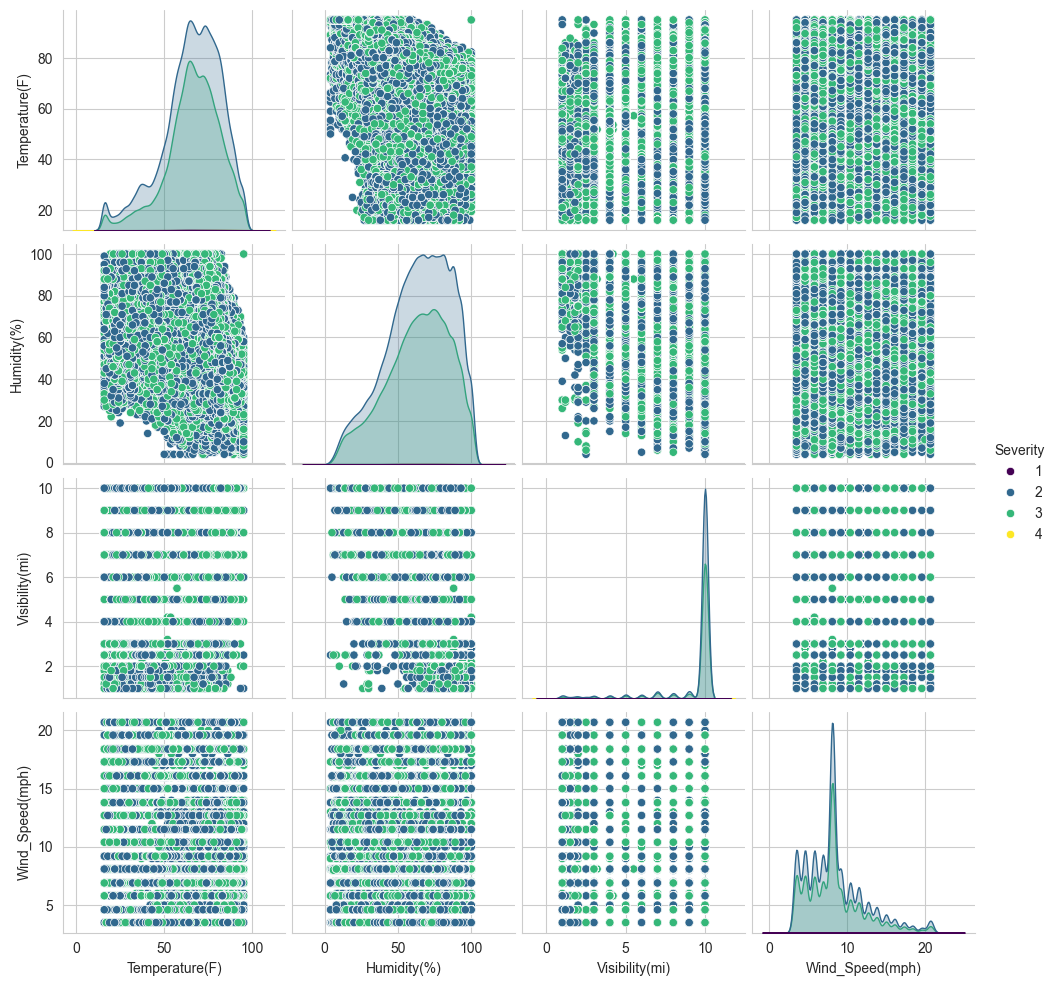

In [56]:
sns.pairplot(
    roadsafe_df[['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']],
    hue='Severity',
    palette='viridis',
    diag_kind='kde'
)
plt.show()

### Correlation Analysis

In [54]:
corrmat = roadsafe_df.corr(numeric_only=True)
corrmat

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,...,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
Severity,1.000000,-0.069603,-0.083750,0.098535,0.017810,-0.021450,-0.019502,-0.006076,-0.019305,-0.067794,...,-0.251842,-0.032924,0.115619,-0.019082,0.007805,-0.004976,-0.084271,-0.110127,-0.015363,-0.288161
Start_Lat,-0.069603,1.000000,-0.079485,0.016335,-0.449023,-0.025978,-0.029377,-0.096423,0.127885,0.043179,...,-0.019232,0.008942,0.045374,0.030898,0.011600,0.001024,0.008140,0.058605,-0.005461,-0.019487
Start_Lng,-0.083750,-0.079485,1.000000,-0.002741,-0.078859,0.231917,0.277207,-0.049715,0.098751,0.012901,...,0.203181,0.011741,-0.142241,0.017615,-0.032750,-0.001904,0.013952,-0.042872,0.002347,0.224037
Distance(mi),0.098535,0.016335,-0.002741,1.000000,-0.469637,0.108124,0.158474,-0.137464,0.026324,-0.007756,...,-0.030371,0.003792,0.041743,-0.011389,-0.002918,-0.005846,-0.013207,-0.036882,-0.002322,-0.002302
Temperature(F),0.017810,-0.449023,-0.078859,-0.469637,1.000000,-0.429505,-0.244328,0.259799,-0.043782,-0.018133,...,0.015727,-0.007500,-0.024860,-0.006110,-0.005798,-0.000883,0.000740,-0.022463,0.003883,0.013009
Humidity(%),-0.021450,-0.025978,0.231917,0.108124,-0.429505,1.000000,0.075119,-0.370053,-0.104710,0.006938,...,0.058281,0.004608,-0.015458,0.002318,0.005728,0.004080,0.012397,-0.005294,0.001752,0.053160
Pressure(in),-0.019502,-0.029377,0.277207,0.158474,-0.244328,0.075119,1.000000,0.054688,-0.106266,0.005014,...,0.070896,0.003238,-0.022617,0.002430,-0.005458,-0.001737,0.008015,-0.002769,0.007715,0.067350
Visibility(mi),-0.006076,-0.096423,-0.049715,-0.137464,0.259799,-0.370053,0.054688,1.000000,0.005017,-0.001049,...,0.016572,0.002588,0.007415,0.001205,0.005494,0.002248,0.009285,0.004315,0.004153,0.015393
Wind_Speed(mph),-0.019305,0.127885,0.098751,0.026324,-0.043782,-0.104710,-0.106266,0.005017,1.000000,0.016022,...,0.036150,0.001363,0.003321,0.007879,-0.000568,-0.003714,0.005201,0.013198,0.004891,0.029670
Amenity,-0.067794,0.043179,0.012901,-0.007756,-0.018133,0.006938,0.005014,-0.001049,0.016022,1.000000,...,0.113027,0.019899,-0.025893,0.003558,0.021085,-0.000573,0.118971,0.031339,0.014376,0.085006


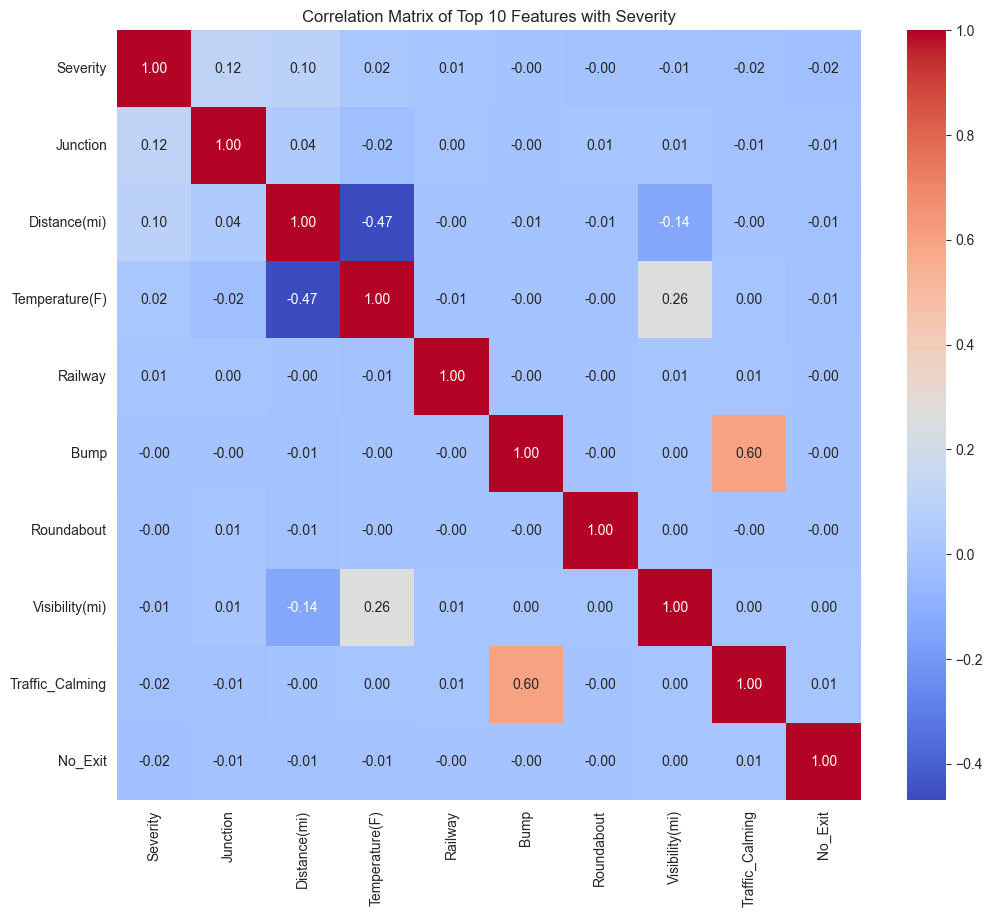

In [55]:
top_corr_features = corrmat.nlargest(10, 'Severity')['Severity'].index
top_corr_matrix = roadsafe_df[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features with Severity')
plt.show()